Using a Machine Learning model we make prediction over images

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [78]:
%reload_ext watermark
%watermark -a "César S. Hooper/ Março 2022. email: sanchecesar@gmail.com" --iversions
!python --version

Author: César S. Hooper/ Março 2022. email: sanchecesar@gmail.com

matplotlib: 3.3.4
numpy     : 1.19.5
cv2       : 4.5.4-dev
pandas    : 1.2.4

Python 3.8.8


In [57]:
path = '.....'

## O que vou fazer?

Vamos escolher um conjunto de frames de um vídeo. Cada frame é uma imagem e cada imagem representa um momento diferente no tempo. 

O método aquí proposto consiste em contruir uma serie com cada pixel da imagem. A regressão de uma imagen será feita para a cada pixel. 

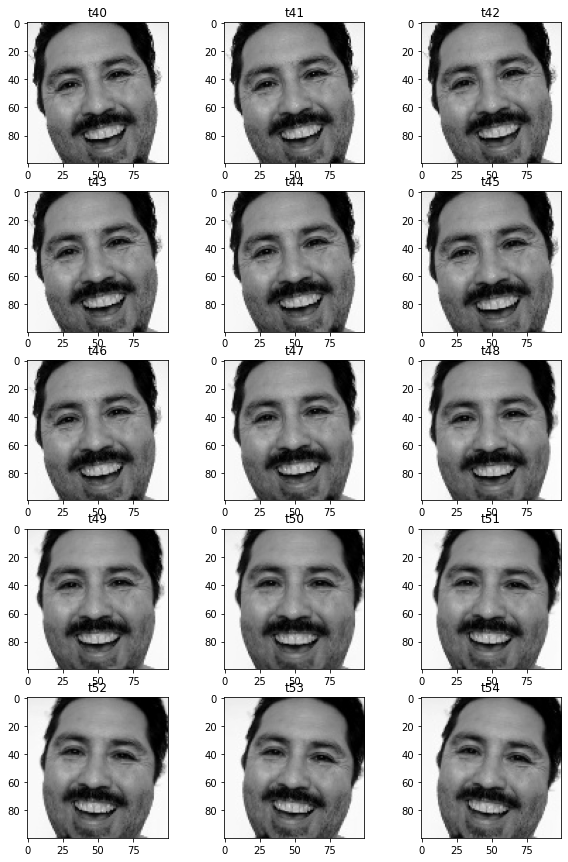

In [66]:
imagenes = []
for k in range(71, 130):
    im = cv2.imread(path  + 'rostro' + str(k) + '.jpg', 0)
    imagenes.append(im)
    
p=1
plt.figure(figsize=(10, 15))
for nome in range(40, 55):
    plt.subplot(5, 3, p)
    plt.imshow(imagenes[nome], cmap='gray')
    plt.title('t'+str(nome))
    p+=1

Vamos formar vetores com as imagens. Cada imagem corresponde a um momento e cada uma tem 10.000 pixeis. Então, vamos formar vetores colunas de 10.000 elementos que representem cada instante de tempo.

In [32]:
N = len(imagenes)
dataset = pd.DataFrame(columns=['t'+str(u) for u in range(N)])
k = 0
for foto in imagenes:
    #dataset.loc[k] = imagenes[k].reshape(-1, 10000)[0]
    dataset['t' + str(k)]  = imagenes[k].reshape(-1, 10000)[0]
    k +=  1

In [61]:
dataset.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t49,t50,t51,t52,t53,t54,t55,t56,t57,t58
0,236,236,235,235,236,237,235,236,237,236,...,235,235,235,235,232,235,236,237,234,237
1,236,236,235,236,236,237,236,236,237,238,...,235,235,235,235,231,235,236,237,235,237
2,236,237,235,236,236,237,237,236,237,238,...,235,235,235,235,231,236,237,237,235,237
3,236,237,235,236,236,237,237,237,237,238,...,235,235,236,235,231,236,236,237,235,236
4,236,237,235,236,236,237,238,237,237,238,...,235,235,236,235,232,236,236,237,236,236


A primeira imagem do nosso dataset de imagens é aquela do instante $t_0$, a seguinte imagem é do instante $t_1$, etc. 

In [64]:
# Escolhemos as primeiras 19 imagens para o treino. A imagen 20 será o target.
datas = dataset[['t'+str(u) for u in range(20)]]

In [65]:
y = dataset['t19']
X = datas.drop(['t19'], axis=1)

In [40]:
# Separamos los datos en
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Crea el objeto y fitea
scaler = StandardScaler()
scaler.fit(X_train)

# normaliza los datos
X_train_tf = scaler.transform(X_train)
X_test_tf = scaler.transform(X_test)

In [41]:
%%time
rfr = RandomForestRegressor(n_estimators=300, max_depth=50)
rfr.fit(X_train_tf, y_train)

y_test_pred = rfr.predict(X_test_tf)
y_train_pred= rfr.predict(X_train_tf)
%time

Wall time: 0 ns
Wall time: 1min 17s


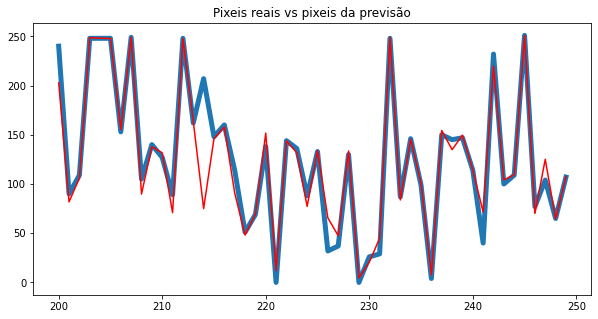

In [69]:
q = np.arange(len(y_test))
plt.figure(figsize=(10,5))
plt.plot(q[200:250] , y_test[200:250], linewidth=5)
plt.plot(q[200:250], y_test_pred[200:250], 'r')
plt.title('Pixeis reais vs pixeis da previsão')
plt.show()

0.9176211686089057

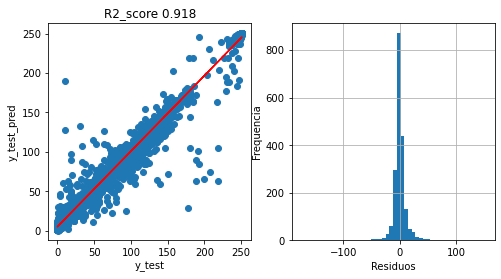

In [44]:
r2, yest = least_squared(y_test, y_test_pred)
r2

As métricas para com os testes estão muito bem. 

Vamos a usar o modelo para prever uma imagem nova. 

In [70]:
# carregando a nova data
dats = dataset[['t'+str(u) for u in range(33, 53)]]
dats.head(5)

,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,t50,t51,t52
0,230,230,231,230,232,233,234,231,232,233,233,231,231,234,233,235,235,235,235,235
1,231,230,230,231,232,232,233,230,231,233,234,237,232,232,233,234,235,235,235,235
2,231,230,230,231,231,231,234,230,232,233,235,235,235,232,234,234,235,235,235,235
3,231,231,230,231,231,232,236,232,233,233,233,232,232,233,234,235,235,235,236,235
4,231,231,230,230,232,232,236,233,233,234,238,230,232,232,233,235,235,235,236,235


In [50]:
## probamos modelo en datos nuevos

dats = dataset[['t'+str(u) for u in range(33, 53)]]
y_fut = dataset['t52']
XX = dats.drop('t52', axis=1)
XX_tf = scaler.transform(XX)

In [51]:
%%time
y_fut_pred = rfr.predict(XX_tf)
%time

Wall time: 0 ns
Wall time: 1.11 s


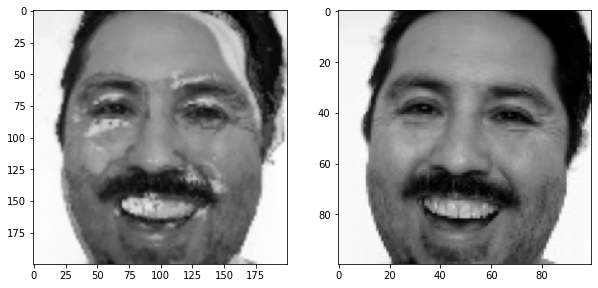

In [53]:
yy_fut_pred = np.floor(y_fut_pred)
yy_fut_pred = np.array(yy_fut_pred, dtype='uint8')
im_pred = yy_fut_pred.reshape(100, 100)
im_pred = cv2.resize(im_pred, (200, 200))
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(im_pred, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(imagenes[52], cmap='gray')

0.7134792493595447

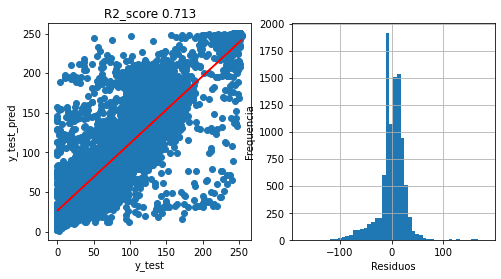

In [54]:
r2, yest = least_squared(y_fut, y_fut_pred)
r2

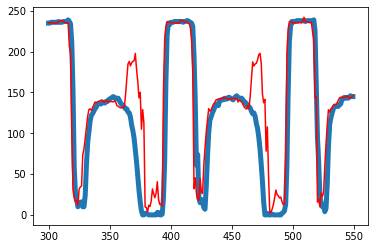

In [55]:
q2 = np.arange(len(y_fut))
plt.plot(q2[300:550] , y_fut[300:550], linewidth=5)
plt.plot(q2[300:550], y_fut_pred[300:550], 'r')

Claramente é preciso melhorar o modelo de machine learning, mas o método consegue prever.

## Apêndice

In [43]:
def least_squared(datox, datoy):
    
    # retorna R2 score y gráfico futuro vs prediccion
    
    # datox: es el dato original futuro
    # datoy: es la prediccion del futuro
           
    promx = datox.mean()
    promy = datoy.mean()

    a = sum(datox*(datoy - promy))/sum(datox*(datox - promx))
    b = promy - a*promx
    
    # la mejor funcion teorica
    y_est = a*datox + b
    
    R2 = sum((y_est - promy)**2)/sum((datox - promy)**2)
    e = pd.Series(y_est - datoy)
    #err_var = e.std()/len(e) # coeficiente de variacion
    
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(datox, datoy)
    plt.xlabel('y_test')
    plt.ylabel('y_test_pred')
    plt.title('R2_score %.3f'%R2)
    plt.plot(datox, y_est, 'r')
    plt.subplot(1, 2, 2)
    e.hist(bins=50)
    plt.xlabel('Residuos')
    plt.ylabel('Frequencia')

    return R2, y_est

# FIM